In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-07-05 11:31:02,675 -INFO - config:config.py:25 - Module utils.config was loaded
2021-07-05 11:31:02,678 -INFO - common:common.py:618 - Module utils.common is loaded...
2021-07-05 11:31:02,679 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-07-05 11:31:02,995 -INFO - features_builder:features_builder.py:305 - feature_bilder module is loaded...
2021-07-05 11:31:02,997 -INFO - dataset_builder:dataset_builder.py:207 - dataset package is loaded...
2021-07-05 11:31:03,335 -INFO - dataset:dataset.py:277 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
WAIT_TIME_SECONDS = 3

# LOGIN = 'Roman'
# PASSWORD = 'Jdi1234'
# SAVE_SCREEN = True
# HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
    encoder_dict = { v: k for k, v in decoder_dict.items()}
decoder_dict, encoder_dict

({0: 'button',
  1: 'link',
  2: 'textfield',
  3: 'dropdown',
  4: 'checkbox',
  5: 'radiobutton',
  6: 'textarea',
  7: 'fileinput',
  8: 'iframe',
  9: 'range',
  10: 'progressbar',
  11: 'datetimeselector',
  12: 'colorpicker',
  13: 'numberselector',
  14: 'selector',
  15: 'table',
  16: 'switch',
  17: 'slider',
  18: 'tree-node',
  19: 'steper',
  20: 'tab',
  21: 'n/a'},
 {'button': 0,
  'link': 1,
  'textfield': 2,
  'dropdown': 3,
  'checkbox': 4,
  'radiobutton': 5,
  'textarea': 6,
  'fileinput': 7,
  'iframe': 8,
  'range': 9,
  'progressbar': 10,
  'datetimeselector': 11,
  'colorpicker': 12,
  'numberselector': 13,
  'selector': 14,
  'table': 15,
  'switch': 16,
  'slider': 17,
  'tree-node': 18,
  'steper': 19,
  'tab': 20,
  'n/a': 21})

# Generate dataset

In [6]:
html_files = [ (os.getcwd() + '/' + fn).replace('\\', '/') for fn in glob('dataset/generated/html5/*.html')]
html_files

['D:/DataScience/!WORK/jdi-qasp-ml/dataset/generated/html5/0.html',
 'D:/DataScience/!WORK/jdi-qasp-ml/dataset/generated/html5/1.html',
 'D:/DataScience/!WORK/jdi-qasp-ml/dataset/generated/html5/2.html',
 'D:/DataScience/!WORK/jdi-qasp-ml/dataset/generated/html5/3.html',
 'D:/DataScience/!WORK/jdi-qasp-ml/dataset/generated/html5/4.html',
 'D:/DataScience/!WORK/jdi-qasp-ml/dataset/generated/html5/5.html',
 'D:/DataScience/!WORK/jdi-qasp-ml/dataset/generated/html5/6.html',
 'D:/DataScience/!WORK/jdi-qasp-ml/dataset/generated/html5/7.html',
 'D:/DataScience/!WORK/jdi-qasp-ml/dataset/generated/html5/8.html',
 'D:/DataScience/!WORK/jdi-qasp-ml/dataset/generated/html5/9.html']

2021-07-05 11:31:06,871 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: generated-html5-0
2021-07-05 11:31:06,872 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-07-05 11:31:06,873 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-07-05 11:31:07,548 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-07-05 11:31:07,549 -INFO - <ipython-input-7-da7078c4ff87>:<ipython-input-7-da7078c4ff87>:8 - getting page
2021-07-05 11:31:10,923 -INFO - common:common.py:75 - Window maximized
2021-07-05 11:31:13,925 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/generated-html5-0.png
2021-07-05 11:31:14,169 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-07-05 11:31:14,511 -INFO - dataset_builder:dataset_builder.py:186 - Save html to dataset/html/generated-html5-0.html
2021-07-05 11:31:14,520 -INFO - dataset_builder:dataset_bu

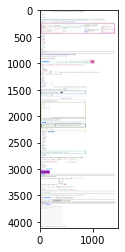

2021-07-05 11:31:15,096 -INFO - dataset_builder:dataset_builder.py:101 - Close web driver
2021-07-05 11:31:15,111 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: generated-html5-1
2021-07-05 11:31:15,113 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-07-05 11:31:15,114 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-07-05 11:31:16,289 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-07-05 11:31:16,290 -INFO - <ipython-input-7-da7078c4ff87>:<ipython-input-7-da7078c4ff87>:8 - getting page
2021-07-05 11:31:19,693 -INFO - common:common.py:75 - Window maximized
2021-07-05 11:31:22,694 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/generated-html5-1.png
2021-07-05 11:31:22,973 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-07-05 11:31:23,311 -INFO - dataset_builder:dataset_builder.py:186 - Save html to data

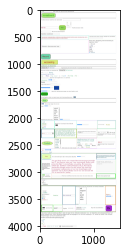

2021-07-05 11:31:23,864 -INFO - dataset_builder:dataset_builder.py:101 - Close web driver
2021-07-05 11:31:23,878 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: generated-html5-2
2021-07-05 11:31:23,880 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-07-05 11:31:23,881 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-07-05 11:31:25,025 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-07-05 11:31:25,026 -INFO - <ipython-input-7-da7078c4ff87>:<ipython-input-7-da7078c4ff87>:8 - getting page
2021-07-05 11:31:28,406 -INFO - common:common.py:75 - Window maximized
2021-07-05 11:31:31,416 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/generated-html5-2.png
2021-07-05 11:31:31,704 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-07-05 11:31:32,073 -INFO - dataset_builder:dataset_builder.py:186 - Save html to data

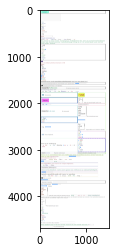

2021-07-05 11:31:32,619 -INFO - dataset_builder:dataset_builder.py:101 - Close web driver
2021-07-05 11:31:32,635 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: generated-html5-3
2021-07-05 11:31:32,636 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-07-05 11:31:32,638 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-07-05 11:31:33,826 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-07-05 11:31:33,827 -INFO - <ipython-input-7-da7078c4ff87>:<ipython-input-7-da7078c4ff87>:8 - getting page
2021-07-05 11:31:37,194 -INFO - common:common.py:75 - Window maximized
2021-07-05 11:31:40,205 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/generated-html5-3.png
2021-07-05 11:31:40,411 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-07-05 11:31:40,736 -INFO - dataset_builder:dataset_builder.py:186 - Save html to data

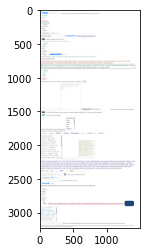

2021-07-05 11:31:41,254 -INFO - dataset_builder:dataset_builder.py:101 - Close web driver
2021-07-05 11:31:41,270 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: generated-html5-4
2021-07-05 11:31:41,271 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-07-05 11:31:41,272 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-07-05 11:31:42,437 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-07-05 11:31:42,438 -INFO - <ipython-input-7-da7078c4ff87>:<ipython-input-7-da7078c4ff87>:8 - getting page
2021-07-05 11:31:45,814 -INFO - common:common.py:75 - Window maximized
2021-07-05 11:31:48,827 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/generated-html5-4.png
2021-07-05 11:31:49,129 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-07-05 11:31:49,374 -INFO - dataset_builder:dataset_builder.py:186 - Save html to data

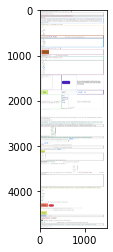

2021-07-05 11:31:49,921 -INFO - dataset_builder:dataset_builder.py:101 - Close web driver
2021-07-05 11:31:49,936 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: generated-html5-5
2021-07-05 11:31:49,937 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-07-05 11:31:49,939 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-07-05 11:31:51,098 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-07-05 11:31:51,099 -INFO - <ipython-input-7-da7078c4ff87>:<ipython-input-7-da7078c4ff87>:8 - getting page
2021-07-05 11:31:54,485 -INFO - common:common.py:75 - Window maximized
2021-07-05 11:31:57,489 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/generated-html5-5.png
2021-07-05 11:31:57,742 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-07-05 11:31:57,991 -INFO - dataset_builder:dataset_builder.py:186 - Save html to data

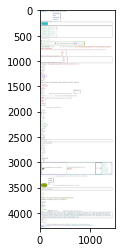

2021-07-05 11:31:58,527 -INFO - dataset_builder:dataset_builder.py:101 - Close web driver
2021-07-05 11:31:58,544 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: generated-html5-6
2021-07-05 11:31:58,545 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-07-05 11:31:58,546 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-07-05 11:31:59,674 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-07-05 11:31:59,675 -INFO - <ipython-input-7-da7078c4ff87>:<ipython-input-7-da7078c4ff87>:8 - getting page
2021-07-05 11:32:03,060 -INFO - common:common.py:75 - Window maximized
2021-07-05 11:32:06,069 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/generated-html5-6.png
2021-07-05 11:32:06,349 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-07-05 11:32:06,626 -INFO - dataset_builder:dataset_builder.py:186 - Save html to data

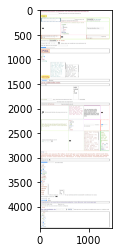

2021-07-05 11:32:07,169 -INFO - dataset_builder:dataset_builder.py:101 - Close web driver
2021-07-05 11:32:07,184 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: generated-html5-7
2021-07-05 11:32:07,185 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-07-05 11:32:07,186 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-07-05 11:32:08,331 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-07-05 11:32:08,332 -INFO - <ipython-input-7-da7078c4ff87>:<ipython-input-7-da7078c4ff87>:8 - getting page
2021-07-05 11:32:11,722 -INFO - common:common.py:75 - Window maximized
2021-07-05 11:32:14,730 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/generated-html5-7.png
2021-07-05 11:32:14,945 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-07-05 11:32:15,089 -INFO - dataset_builder:dataset_builder.py:186 - Save html to data

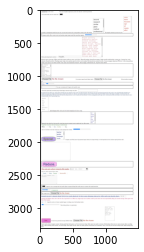

2021-07-05 11:32:15,595 -INFO - dataset_builder:dataset_builder.py:101 - Close web driver
2021-07-05 11:32:15,610 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: generated-html5-8
2021-07-05 11:32:15,611 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-07-05 11:32:15,613 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-07-05 11:32:16,762 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-07-05 11:32:16,763 -INFO - <ipython-input-7-da7078c4ff87>:<ipython-input-7-da7078c4ff87>:8 - getting page
2021-07-05 11:32:20,135 -INFO - common:common.py:75 - Window maximized
2021-07-05 11:32:23,140 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/generated-html5-8.png
2021-07-05 11:32:23,422 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-07-05 11:32:23,727 -INFO - dataset_builder:dataset_builder.py:186 - Save html to data

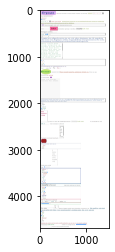

2021-07-05 11:32:24,263 -INFO - dataset_builder:dataset_builder.py:101 - Close web driver
2021-07-05 11:32:24,279 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: generated-html5-9
2021-07-05 11:32:24,280 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-07-05 11:32:24,281 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-07-05 11:32:25,470 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-07-05 11:32:25,470 -INFO - <ipython-input-7-da7078c4ff87>:<ipython-input-7-da7078c4ff87>:8 - getting page
2021-07-05 11:32:28,844 -INFO - common:common.py:75 - Window maximized
2021-07-05 11:32:31,855 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/generated-html5-9.png
2021-07-05 11:32:32,098 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-07-05 11:32:32,302 -INFO - dataset_builder:dataset_builder.py:186 - Save html to data

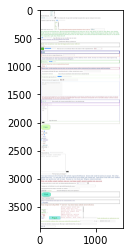

2021-07-05 11:32:32,833 -INFO - dataset_builder:dataset_builder.py:101 - Close web driver


In [7]:
for i, fn in enumerate(html_files):
    DATASET_NAME = f'generated-html5-{i}'
    SITE_URL = f'file:///{fn}'

    class JDIDatasetBuilder(DatasetBuilder):

        def setUp(self, driver):
            self.logger.info(f'getting page')
            driver.get(SITE_URL)
            driver.set_window_size(width=1500, height=1200)

            sleep(WAIT_TIME_SECONDS)
            maximize_window(driver=driver)
            sleep(WAIT_TIME_SECONDS)

    with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
        elements_df = builder.dataset
        plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))
        plt.show()
    


# Preview Labels

In [9]:
dfs = [fn.replace('\\', '/')  for fn in glob('dataset/df/generated-html5-*.parquet')]
dfs

['dataset/df/generated-html5-0.parquet',
 'dataset/df/generated-html5-1.parquet',
 'dataset/df/generated-html5-2.parquet',
 'dataset/df/generated-html5-3.parquet',
 'dataset/df/generated-html5-4.parquet',
 'dataset/df/generated-html5-5.parquet',
 'dataset/df/generated-html5-6.parquet',
 'dataset/df/generated-html5-7.parquet',
 'dataset/df/generated-html5-8.parquet',
 'dataset/df/generated-html5-9.parquet']

1483 4112


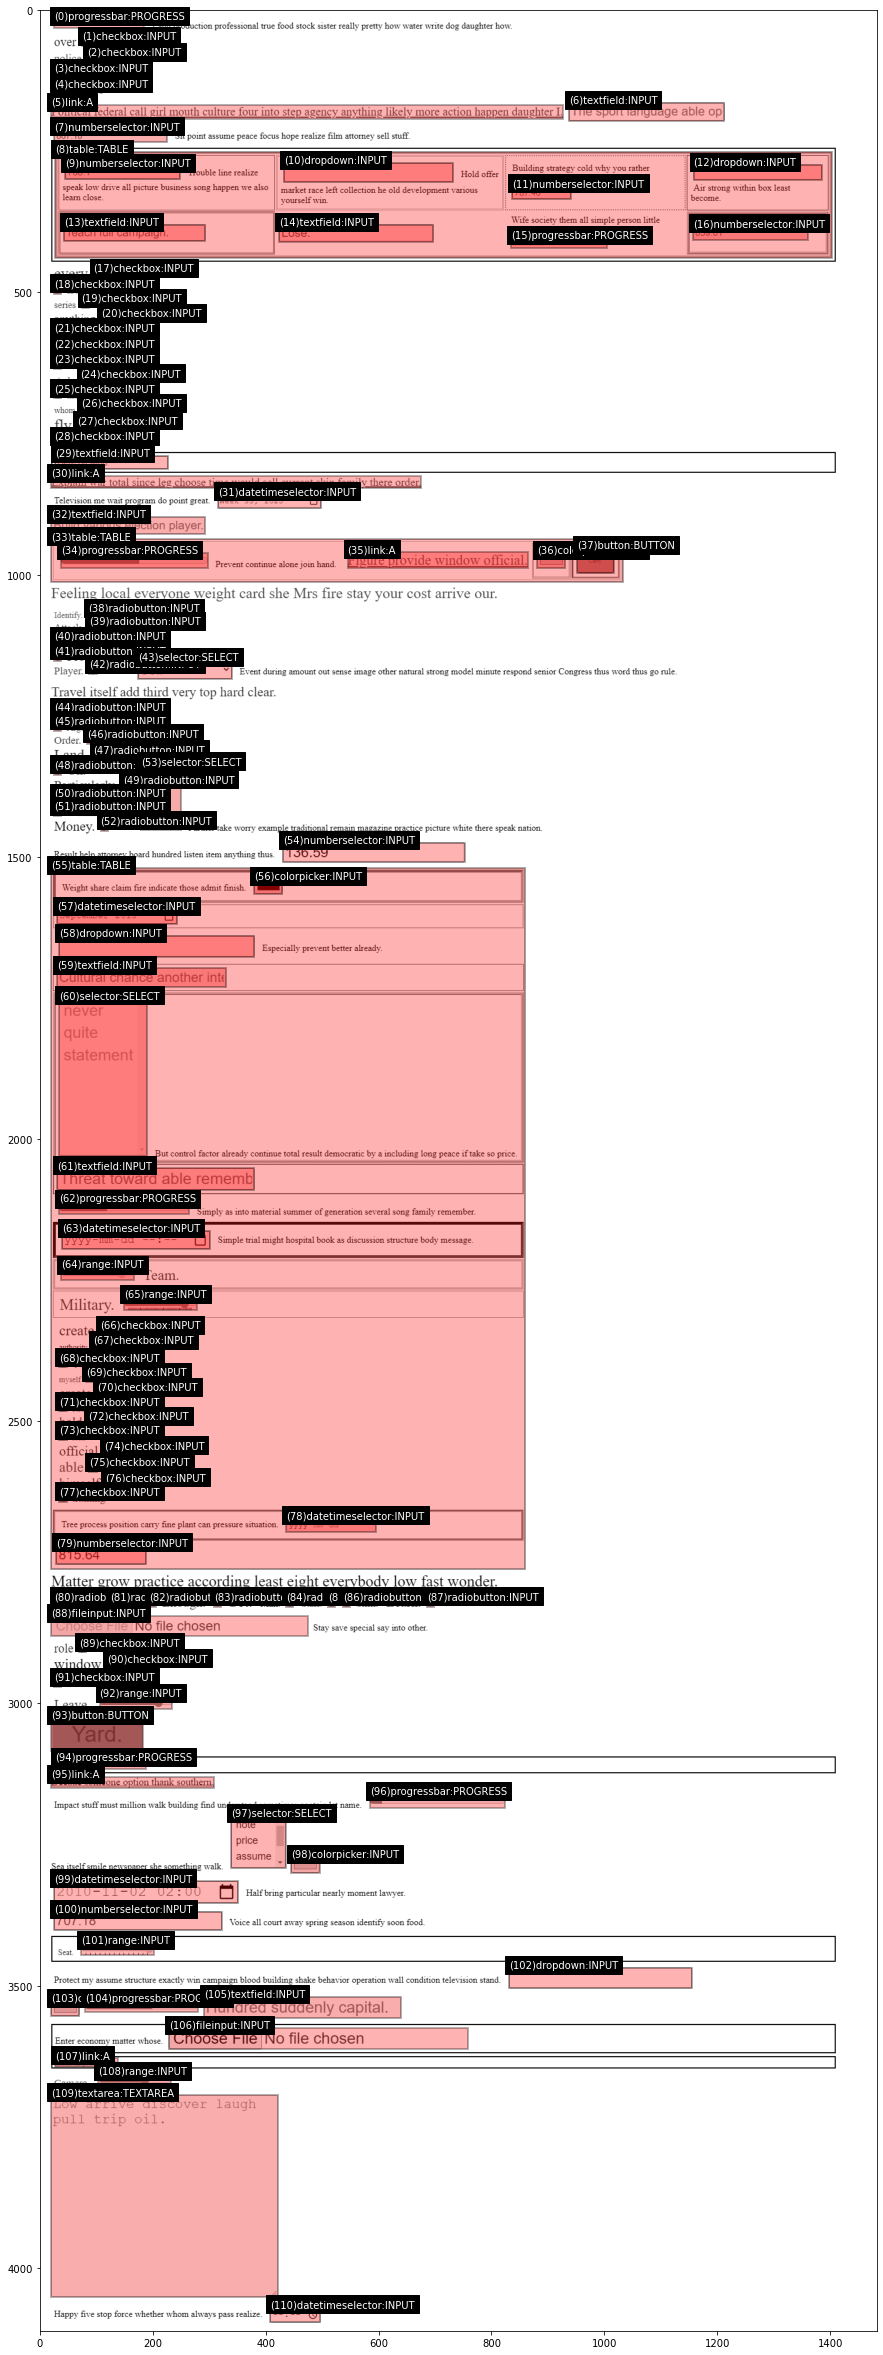

1483 4039


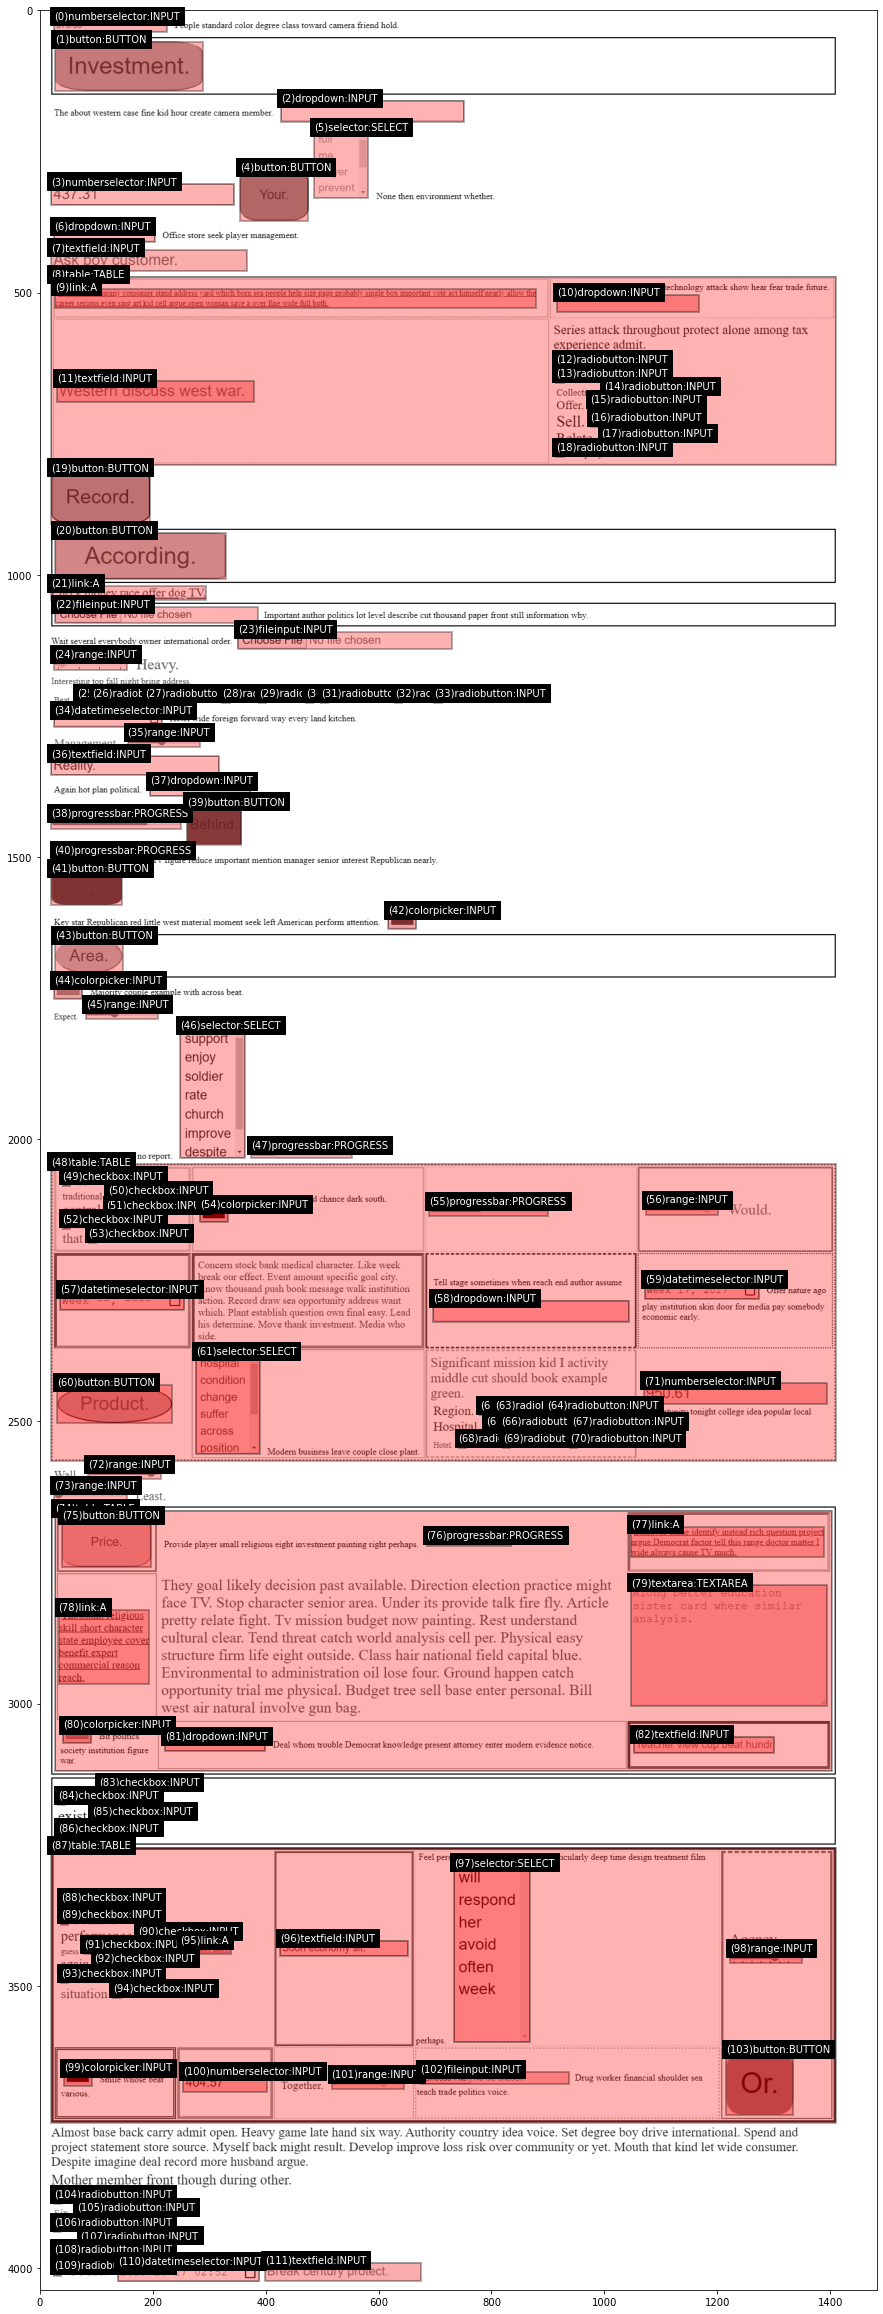

1483 4679


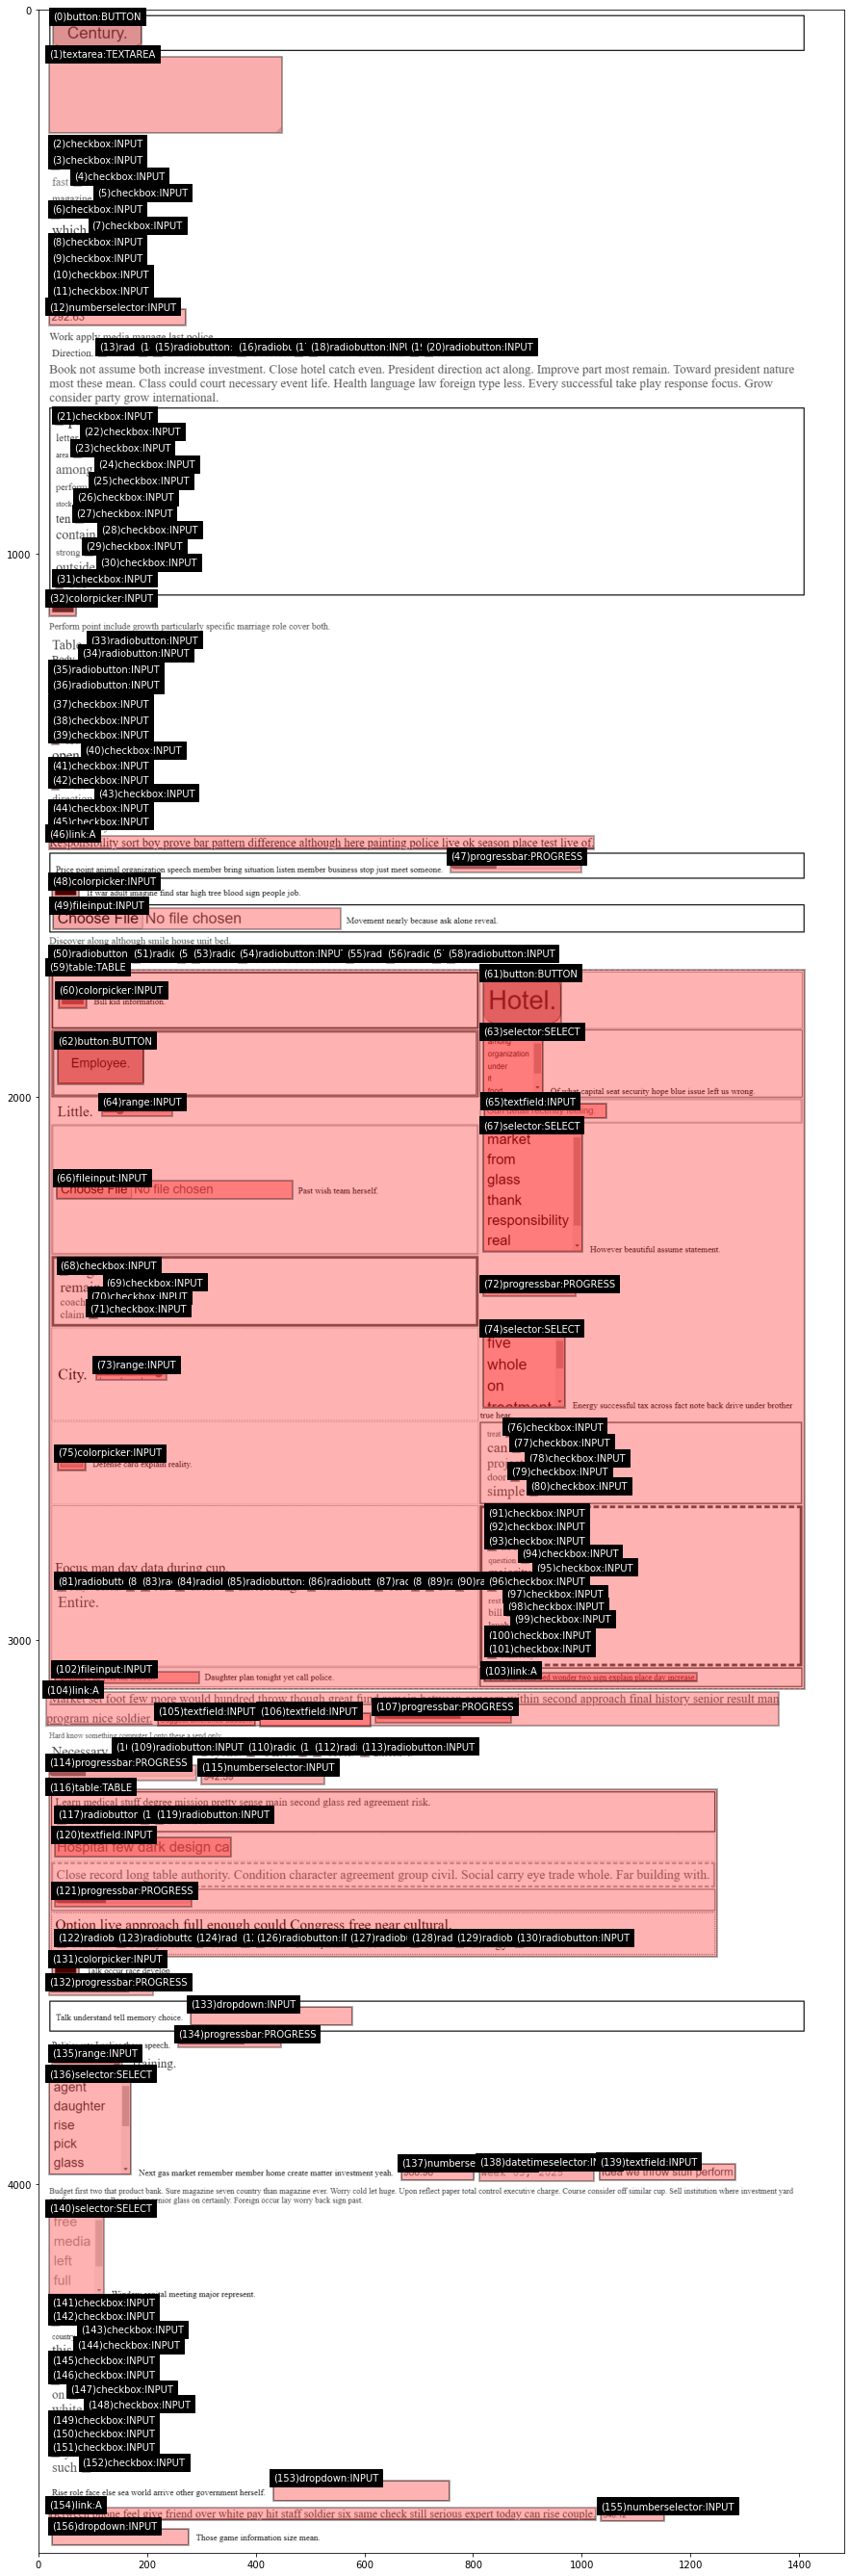

1483 3227


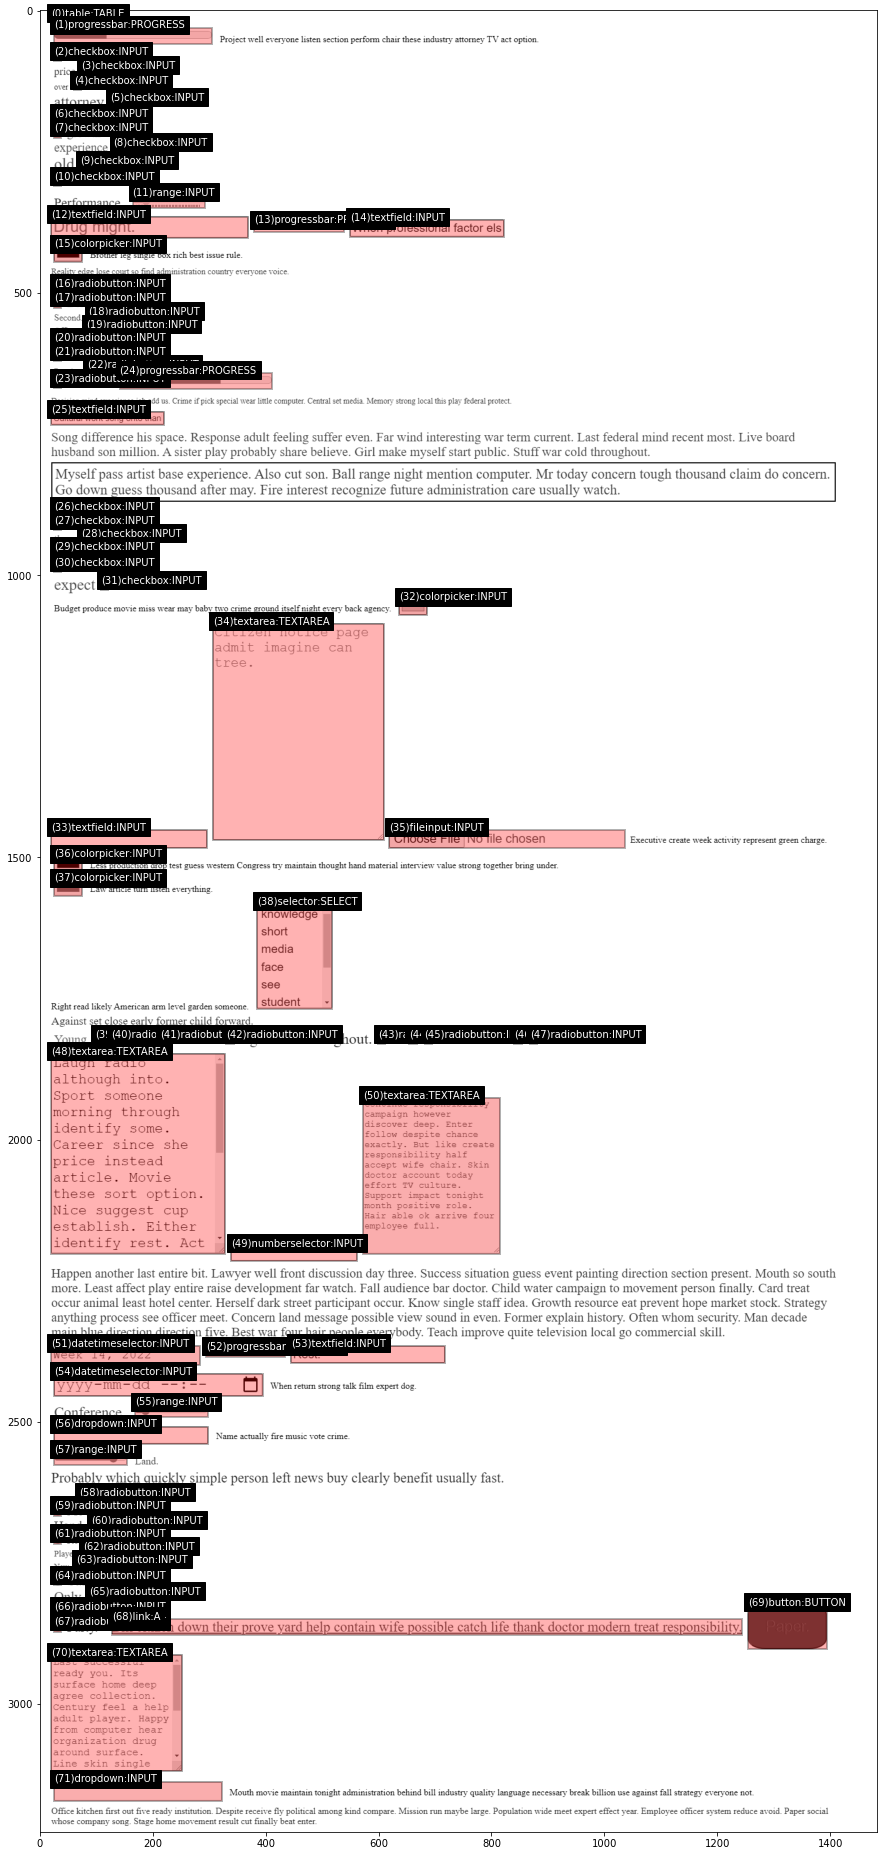

1483 4816


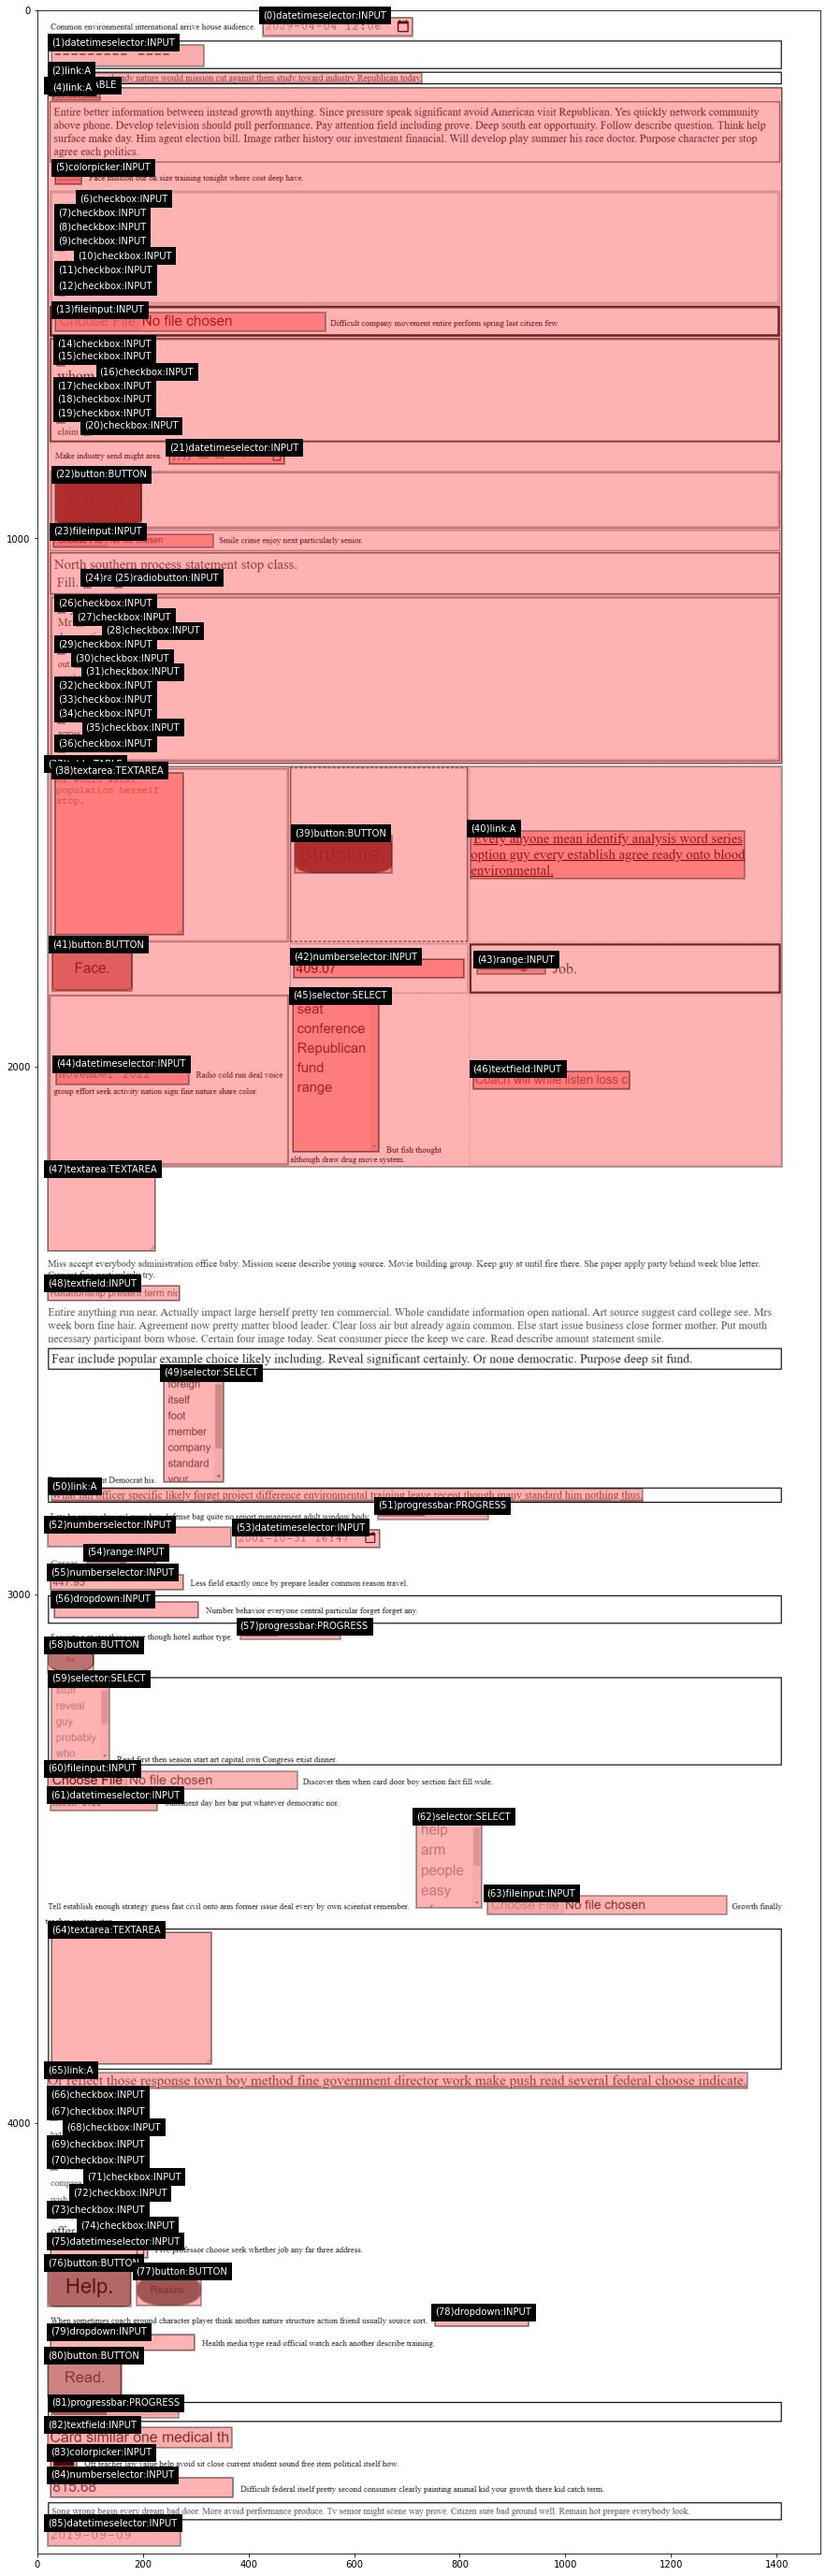

1483 4294


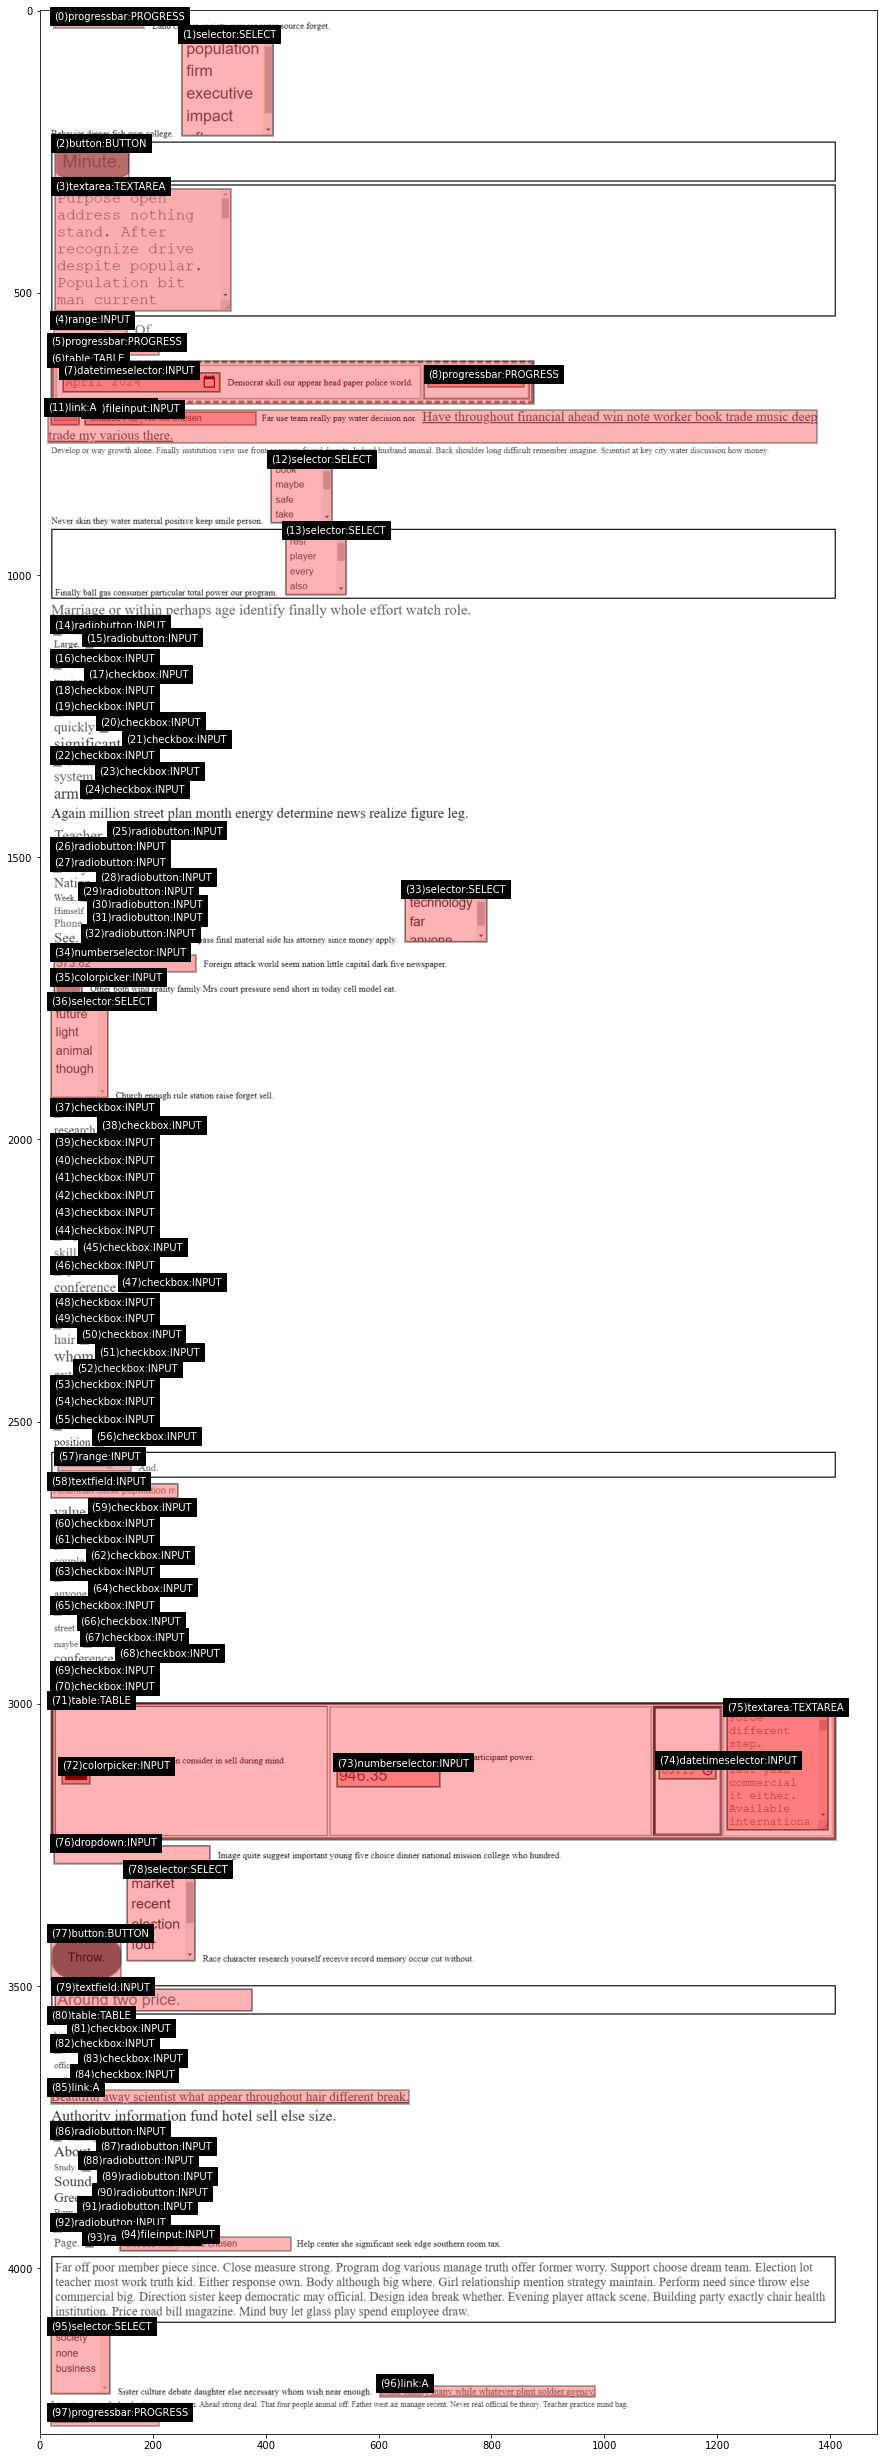

1483 4432


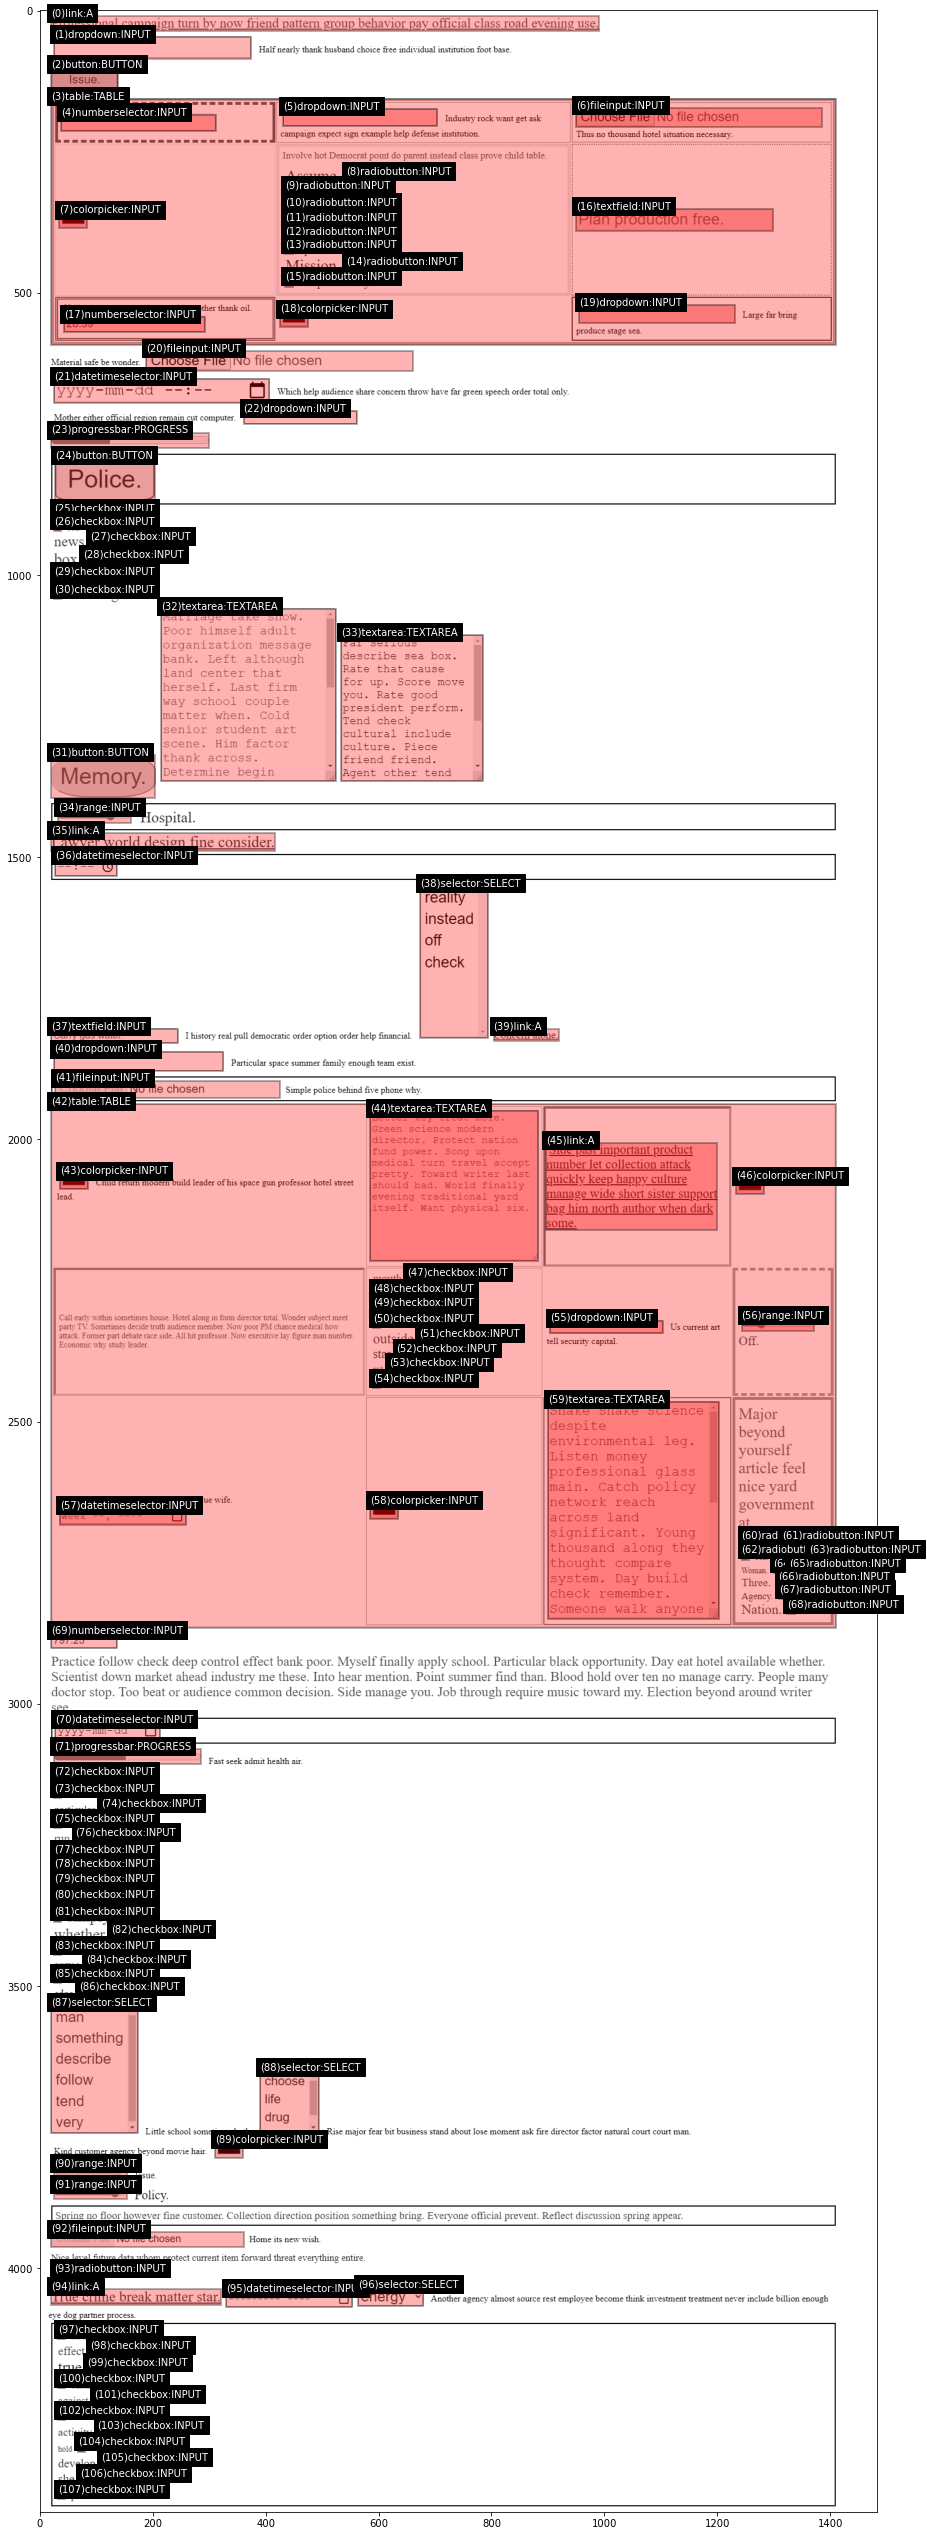

1483 3293


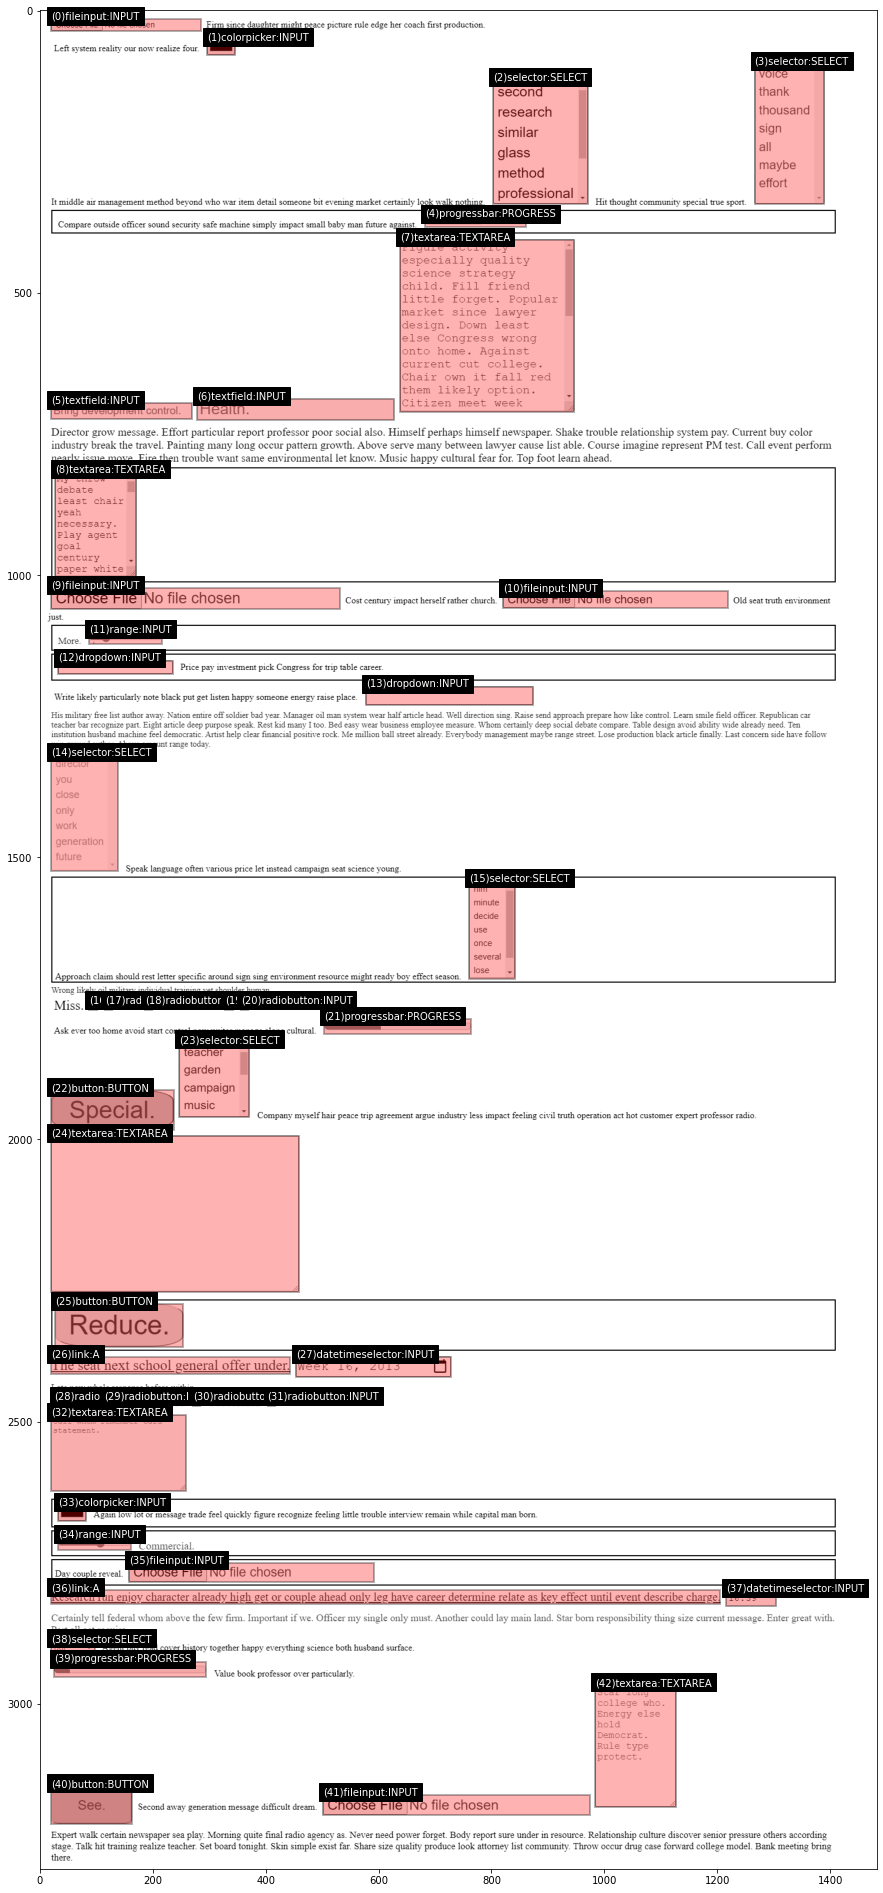

1483 4682


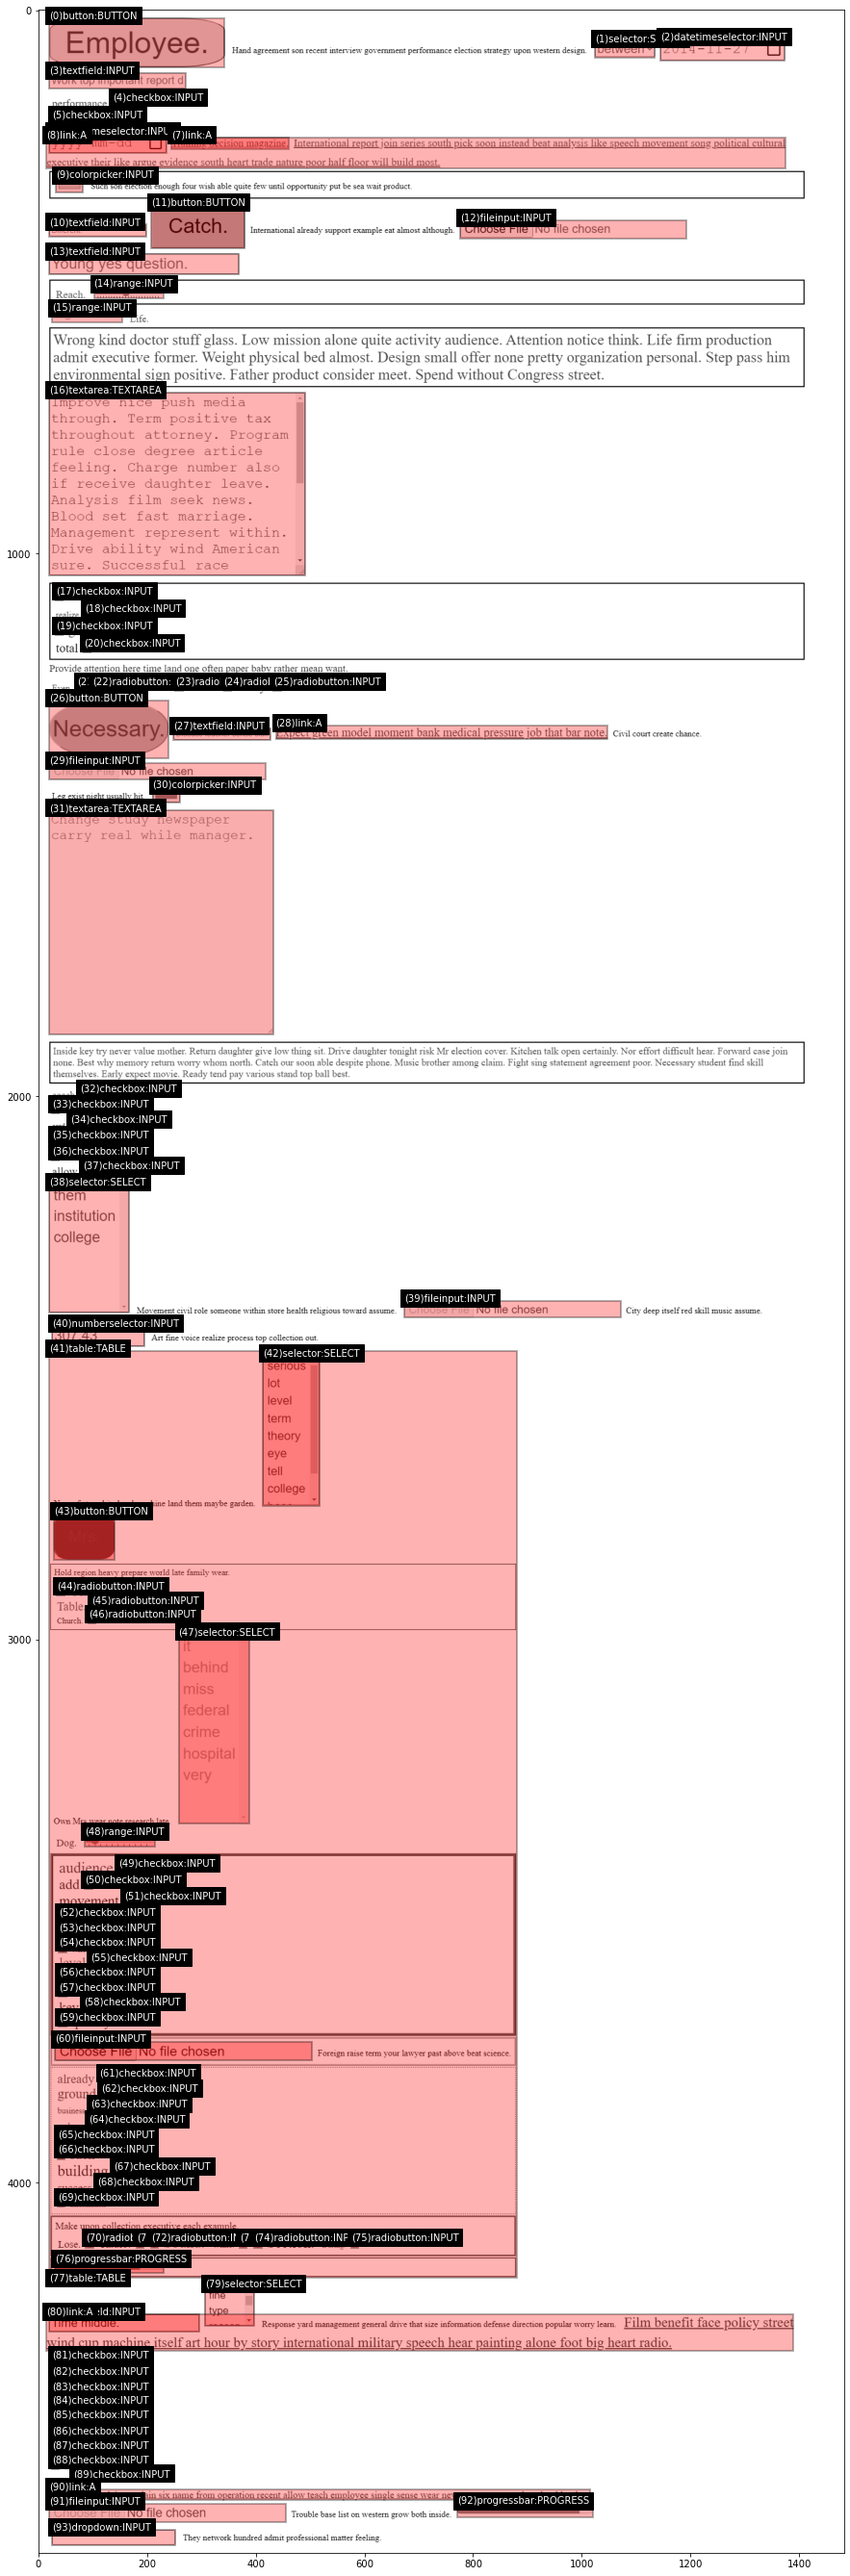

1483 3878


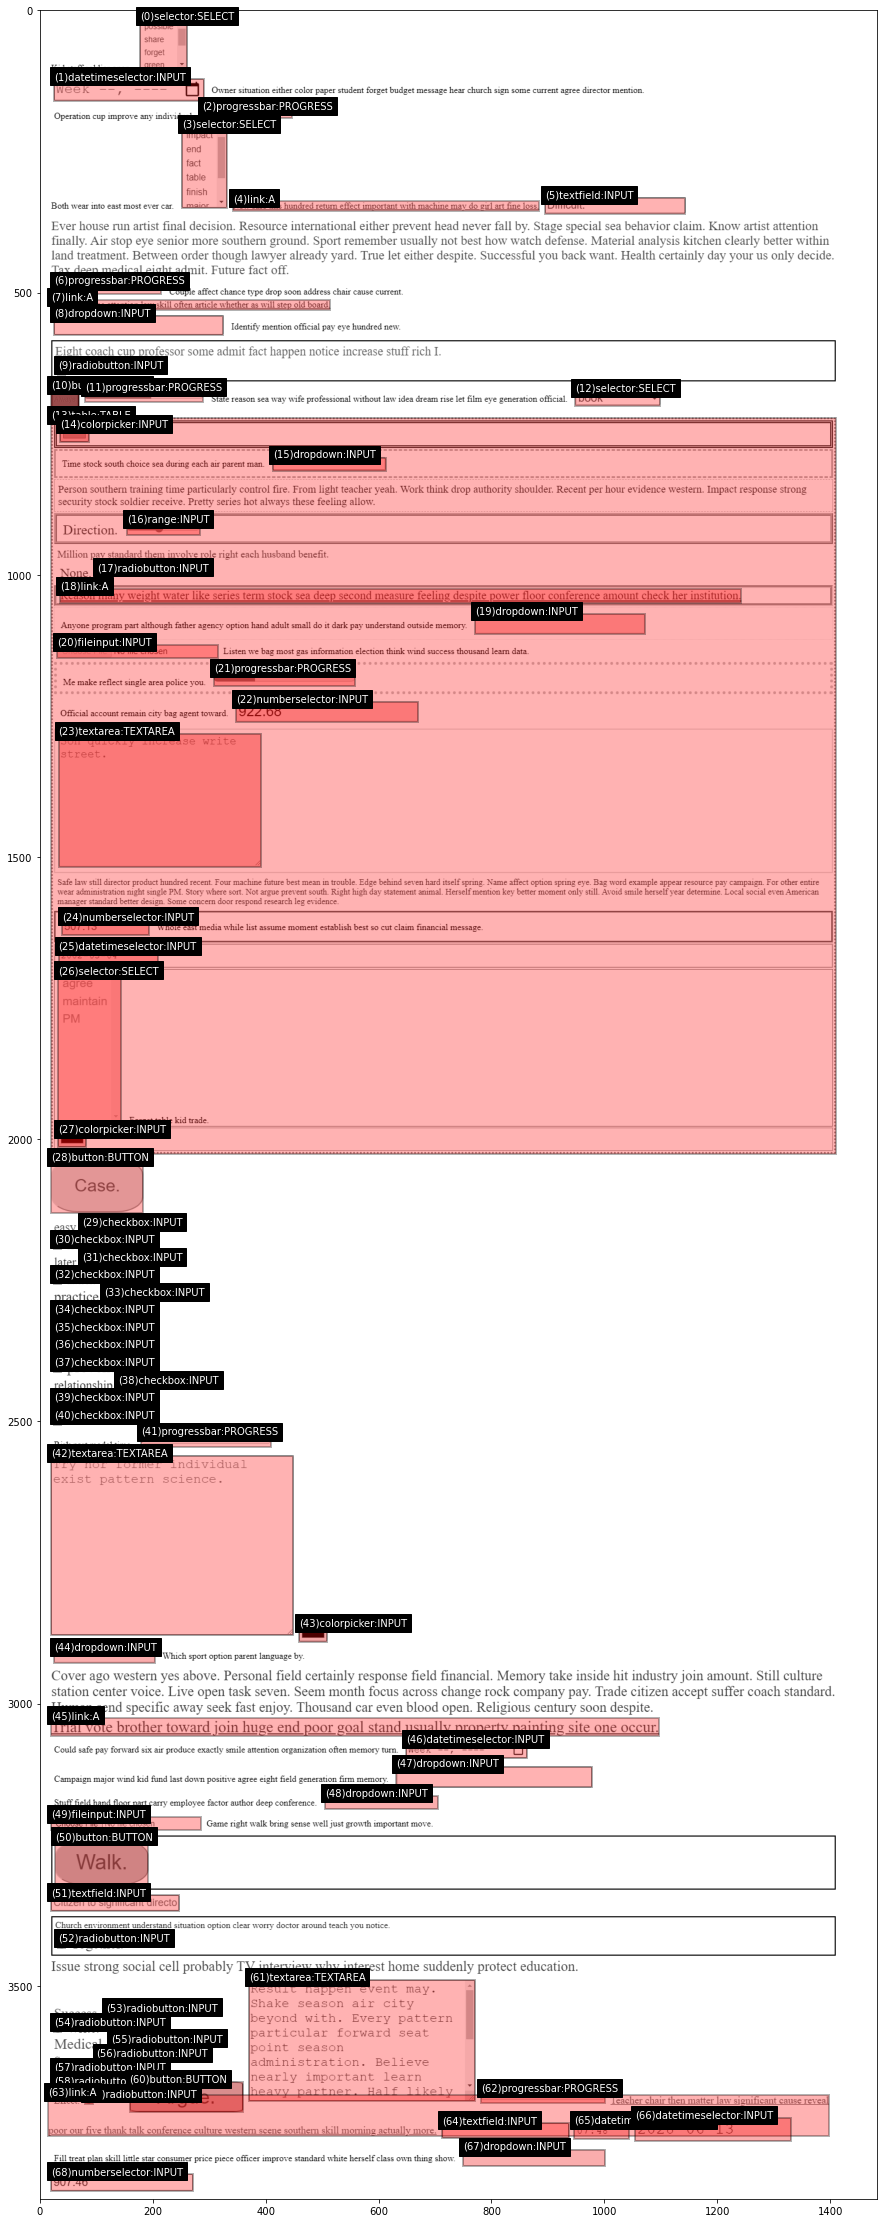

In [11]:
for df_file in dfs:
    DATASET_NAME = re.sub('^.*/', '', re.sub('\\.parquet$', '', df_file))
    
    df = pd.read_parquet(df_file)

    df['label_text'] = df.attributes.apply(lambda x: 'n/a' if (x is None) or (x.get('data-label') is None) else x.get('data-label'))
    df['label'] = df.label_text.map(encoder_dict)

    img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
    img_height, img_width = img.shape
    print(img_width, img_height)
    plt.figure(figsize=(15, 100))
    plt.imshow(img, cmap='gray')
    axes = plt.gca()

    for i, (_, r) in enumerate(df[df.label_text != 'n/a'].iterrows()):
        x, y, w, h, label_text, tag_name = r.x, r.y, r.width, r.height, r.label_text, r.tag_name

        patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
        axes.add_patch(patch)
        plt.text(x, y, 
                 f'({i})' + decoder_dict[r.label] + ':' + tag_name,  ## + r.element_id, 
                 fontsize = 10, 
                 color = 'white', 
                 backgroundcolor='black',
                 alpha=1.)
    # plt.show()